# Задача

Найти приближенное решение для игры с данной платежной
матрицей
\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
     & B1 & B2 & B3 \\
\hline
A1 & $1$ & $-2$ & $-1$ \\
\hline
A2 & $0$ & $4$ & $6$ \\
\hline
A3 & $-3$ & $5$ & $6$ \\
\hline
A4 & $8$ & $-6$ & $-6$ \\
\hline
\end{tabular}
\end{table}

Будем считать, что в первой партии
игрок A воспользуется максиминной стратегией $A_2$. При этом игрок А
может получить выигрыши $0,4,6$ при ответе игрока В стратегиями
$B_1, B_2, B_3$ соответственно. С целью минимизации проигрыша игрок В
применит в первой партии стратегию $B_1$. В этом случае его проигрыш
составит $1, 0, -3, 8$ в зависимости от использования первым игроком одной из стратегий $A_1, A_2, A_3, A_4$.

По формулам $$\nu_1(k)=\frac{1}{k}\underset{j}{min}\ a_j(k) \quad \quad \nu_2(k)=\frac{1}{k}\underset{i}{max}\ b_i(k)$$
определяем наименьший из выигрышей игрока A и наибольший из проигрышей игрока B по результатам первой партии.

Они равны соответственно $$\nu_1(1)=0, \ \nu_2(1)=8.$$

Приближенное значение цены игры будем находить по формуле:
$$\nu^*=(\underset{k}{max}\ \nu_1(k) + \underset{k}{min}\ \nu_2(k))/2.$$

В данном случае оно равно $\nu^* = 4$.

Таким образом выглядит одна итерация процесса решения задачи. Приведем еще одну итерацию.

Во второй партии игрок А с расчетом, что игрок В продолжит
пользоваться стратегией $B_1$ применит для наибольшего выигрыша
стратегию $A_4$.  При этом накопленные за две партии выигрыши игрока $A$ при различных чистых стратегиях игрока B могут составить $8,-2 $ или $0$.
Следовательно, выбор игрока B падет на стратегию $B_2$, которая даст ему наименьший проигрыш. Суммируем проигрыши игрока В за две партии при различных чистых стратегиях игрока A. Получим $-1,4,2,2$ соответственно.

После разыгрывания двух партий наименьший накопленный
выигрыш игрока $A$ равен $-2$, а наибольший накопленный проигрыш игрока
$B$ равен $4$. Разделив их на число партий $k = 2$ , получаем оценки:
$$\nu_1(2)=-1,\quad \nu_2(2)=2.$$
Вычислим приближенную стоимость игры:
$$\nu^*=(\max\{0,-1\}+\min\{8, 2\})/2=1.$$

Таким образом выглядит еще одна итерация процесса решения задачи. И так далее. Для упрощения приведем программную реализацию данного итерационного процесса по алгоритму, описанному выше.

нет седловой точки


,"Номер партии, k",Номер стратегии A,p1k,p2k,p3k,Номер стратегии B,q1k,q2k,q3k,q4k,Оценка 1,Оценка 2,Приближенная цена игры
0,1,2,0.0,4.0,6.0,1,1.0,0.0,-3.0,8.0,0.000,8.000,4.000
1,2,4,8.0,-2.0,0.0,2,-1.0,4.0,2.0,2.0,-1.000,2.000,1.000
2,3,2,8.0,2.0,6.0,2,-3.0,8.0,7.0,-4.0,0.667,2.667,1.334
3,4,2,8.0,6.0,12.0,2,-5.0,12.0,12.0,-10.0,1.500,3.000,1.750
4,5,2,8.0,10.0,18.0,1,-4.0,12.0,9.0,-2.0,1.600,2.400,1.800
5,6,2,8.0,14.0,24.0,1,-3.0,12.0,6.0,6.0,1.333,2.000,1.800
6,7,2,8.0,18.0,30.0,1,-2.0,12.0,3.0,14.0,1.143,2.000,1.800
7,8,4,16.0,12.0,24.0,2,-4.0,16.0,8.0,8.0,1.500,2.000,1.800
8,9,2,16.0,16.0,30.0,1,-3.0,16.0,5.0,16.0,1.778,1.778,1.778


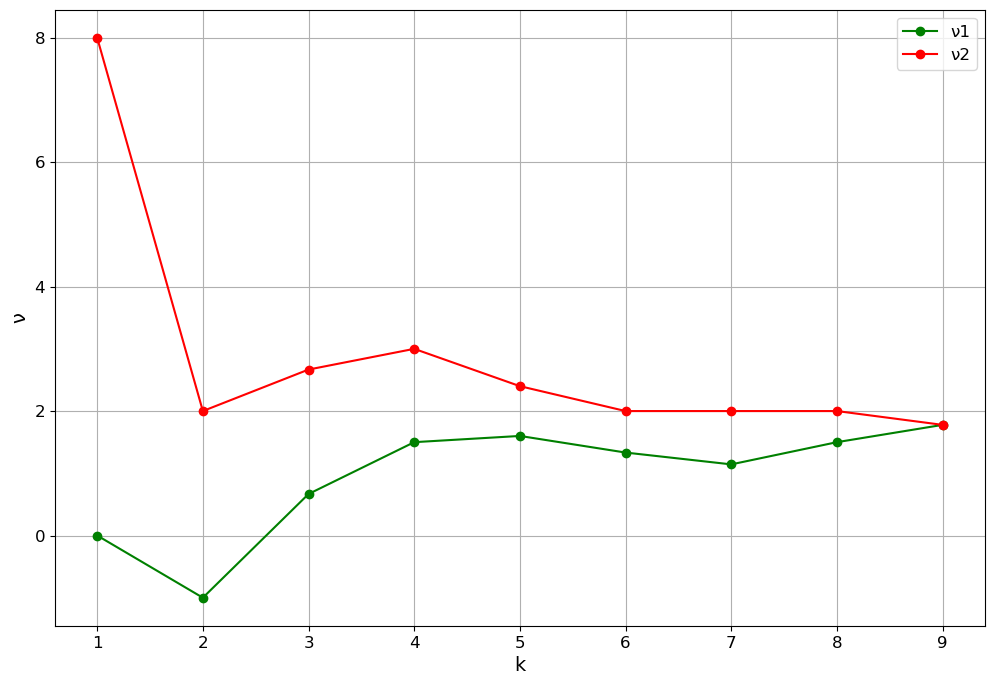

In [26]:
import numpy as np
import pandas as pd

def strat(A):
    minrow = np.min(A, axis=1) # Минимальные значения каждой строки
    maxcolumn = np.max(A, axis=0) # Максимальные значения каждого столбца
    indrow = np.argmax(minrow) # Индекс максимального значения в minrow
    indcolumn = np.argmin(maxcolumn) # Индекс минимального значения в maxcolumn
    minmaxrow = np.max(minrow)+1
    maxminrow = np.min(maxcolumn)+1
    return (f'минимальные значения строк: {minrow}\n\
    максимальные значения столбцов: {maxcolumn}\n\
    оптимальная стратегия для А = {indrow = }\n\
    оптимальная стратегия для B = {indcolumn = }\n\
    цена игры = {l[indrow][indcolumn]/2 = }') if minmaxrow == maxminrow else 'нет седловой точки'

def brown_robinsos_method(A, dataframe):
    A = np.array(A)
    itr = 0
    start = np.argmax(np.min(A, axis=1))
    if start >= len(A):
        sys.exit('выбранной стратегии не существует')
    gamma1 = []
    gamma2 = []
    idxA = [0 for _ in range(len(A))]
    idxB = [0 for _ in range(len(A[0]))]
    idxA[start] += 1
    lstart = np.copy(A[start])
    Δk = []
    k = 1
    while itr < 100:
        if k == 1:
            startold=start
            b = A[start].argmin()
            start = A.T[b].argmax()
            blist = np.copy(A.T[b])
            gamma1.append(lstart.min())
            gamma2.append(A.T[b].max())
            idxB[b]+=1
            verB=[A[startold][i] for i in range(len(A[startold]))]
            verA=[A.T[b][i] for i in range(len(A.T[b]))]
            Δk.append((lstart.min() + A.T[b].max())/2)
            dataframe=pd.concat([dataframe, 
                                 pd.DataFrame([pd.Series([k,startold+1]+verB+[np.round(b+1)]+verA+[gamma1[k-1], 
                                                            gamma2[k-1], 
                                                            Δk[k-1]],
                                                index=dataframe.columns)])],
                                                ignore_index=True)
        else:
            startold=start
            lstart += A[start]
            b = lstart.argmin()
            blist += A.T[b]
            start = blist.argmax()
            idxB[b]+=1
            verA=np.sum([np.multiply(A.T[i], idxB[i]) for i in range(len(idxB))], axis=0)
            verB=np.sum([np.multiply(A[i], idxA[i]) for i in range(len(idxA))], axis=0)
            gamma1.append(np.round((lstart.min() / k), 3))
            gamma2.append(np.round((blist.max() / k), 3))
            Δk.append(np.round(((np.array(gamma1).max()) + np.array(gamma2).min())/2, 3))
            dataframe=pd.concat([dataframe, 
                                 pd.DataFrame([pd.Series(
                                     [k, startold+1]+verB.tolist()+[np.round(b+1)]+verA.tolist()+[gamma1[k-1], 
                                    gamma2[k-1], 
                                    Δk[k-1]],
                                     index=dataframe.columns)])],
                                ignore_index=True)
        idxA[start]+=1
        if gamma1[k-1]==gamma2[k-1]:
            break
        k += 1
        itr += 1
    return gamma1, gamma2, dataframe
    
def print_plot(g1, g2):
    import matplotlib.pyplot as plt
    x = [i for i in range(1, len(g1) + 1)]
    plt.figure(figsize=(12, 8)) # Установка более соответствующих пропорций размеров графика
    plt.plot(x, g1, 'o-g', label="ν1")
    plt.plot(x, g2, 'o-r', label="ν2")
    plt.xlabel('k', fontsize=14) # Увеличение размера шрифта для метки оси x
    plt.ylabel('ν', fontsize=14) # Увеличение размера шрифта для метки оси y
    plt.xticks(fontsize=12) # Увеличение размера шрифта меток на оси x
    plt.yticks(fontsize=12) # Увеличение размера шрифта меток на оси y
    plt.legend(fontsize=12) # Увеличение размера шрифта для легенды
    plt.grid(True)
    plt.xticks(ticks=x)
    
A = np.array([[1, -2, 1], [0, 4, 6], [-3, 5, 6], [8, -6, -6]])
print(strat(A))
df=pd.DataFrame(columns=[['Номер партии, k', 'Номер стратегии A']+[f'p{i}k' for i in range(1, len(A[0])+1)]+ ['Номер стратегии B']+ [f"q{i}k" for i in range(1, len(A)+1)]+['Оценка 1', 'Оценка 2', 'Приближенная цена игры']])
if strat(A) == 'нет седловой точки':
    g1, g2, df = brown_robinsos_method(A, df)
    print_plot(g1, g2)
df['Номер партии, k'] = df['Номер партии, k'].astype(int)
df['Номер стратегии A'] = df['Номер стратегии A'].astype(int)
df['Номер стратегии B'] = df['Номер стратегии B'].astype(int)
df